# Image classifier for CIFAR10 dataset using PyTorch

## Load dependencies

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import torch.optim as optim

import time

## Load dataset

In [2]:
transform = transforms.ToTensor()
train_dataset = dataset.CIFAR10('.', train = True, download = True,
                                transform = transform)
test_dataset = dataset.CIFAR10('.', train = False, download = True,
                               transform = transform)

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


## Batching up the data

In [3]:
train = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=128, shuffle=True)

## Build model

In [4]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, 
                           stride=1, padding=1)
    self.bnorm1 = nn.BatchNorm2d(num_features=32)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, 
                           stride=1, padding=1)
    self.bnorm2 = nn.BatchNorm2d(num_features=32)    
    self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.dropout1 = nn.Dropout2d(p=0.2)

    self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, 
                           stride=1, padding=1)
    self.bnorm3 = nn.BatchNorm2d(num_features=64)
    self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, 
                           stride=1, padding=1)
    self.bnorm4 = nn.BatchNorm2d(num_features=64)    
    self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.dropout2 = nn.Dropout2d(p=0.3)

    self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, 
                           stride=1, padding=1)
    self.bnorm5 = nn.BatchNorm2d(num_features=128)
    self.conv6 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, 
                           stride=1, padding=1)
    self.bnorm6 = nn.BatchNorm2d(num_features=128)    
    self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.dropout3 = nn.Dropout2d(p=0.4)

    self.fc1 = nn.Linear(in_features=4 * 4 * 128, out_features=128)
    self.bnorm7 = nn.BatchNorm1d(num_features=128)
    self.dropout4 = nn.Dropout2d(p=0.5)
    self.fc2 = nn.Linear(in_features = 128, out_features = 10)

  def forward(self, X):

    X = F.relu(self.conv1(X))
    X = self.bnorm1(X)
    X = F.relu(self.conv2(X))
    X = self.bnorm2(X)
    X = self.maxpool1(X)
    X = self.dropout1(X)

    X = F.relu(self.conv3(X))
    X = self.bnorm3(X)
    X = F.relu(self.conv4(X))
    X = self.bnorm4(X)
    X = self.maxpool2(X)
    X = self.dropout2(X)

    X = F.relu(self.conv5(X))
    X = self.bnorm5(X)
    X = F.relu(self.conv6(X))
    X = self.bnorm6(X)
    X = self.maxpool3(X)
    X = self.dropout3(X)

    X = X.view(-1, 4 * 4* 128)

    X = F.relu(self.fc1(X))
    X = self.bnorm7(X)
    X = self.dropout4(X)

    X = self.fc2(X)
    return X

## Creating instance for our model

In [5]:
net = Net()
net

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.2, inplace=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout2d(p=0.3, inplace=False)
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), str

## Checking for GPU

In [6]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")
device

device(type='cuda')

## Loading our model on GPU

In [7]:
net.to(device)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.2, inplace=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout2d(p=0.3, inplace=False)
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), str

## Initializing loss function and optimizer for model training

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.01)

## Functions to calculate accuracy and loss

In [9]:
def acc(data):
  correct = 0
  total = 0

  with torch.no_grad():
    for X, y in data:
      X, y = X.to(device), y.to(device)
      output = net(X)
          
      for idx, i in enumerate(output):
        if torch.argmax(i) == y[idx]:
          correct += 1
        total += 1
  return correct/total

def ls(): #loss
  with torch.no_grad():
    v_loss = []
    for X, y in test:
      X, y = X.to(device), y.to(device)
      output = net(X)

      loss = criterion(output, y)
      v_loss.append(loss.item())
    v_loss = np.mean(v_loss)
  return v_loss  

## Model training

In [10]:
epochs = 30
history = {
    'loss': [],
    'accuracy': [],
    'val_loss': [],
    'val_accuracy': [],
}

for epoch in range(epochs):
  train_loss = []
  stime = time.time()
  for X_train, y_train in train:
    X_train, y_train = X_train.to(device), y_train.to(device)
    optimizer.zero_grad()

    output = net(X_train)

    loss = criterion(output, y_train)

    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
  etime = time.time()
  train_loss = np.mean(train_loss)
  etime = etime-stime
  net.eval()
  history['loss'].append(train_loss)
  history['accuracy'].append(acc(train))
  history['val_loss'].append(ls())
  history['val_accuracy'].append(acc(test))
  if epoch<9:
    print(f"Epoch: 0{epoch + 1} | Time: {etime:.3f}s | Loss: {train_loss:.10f} | Accuracy: {acc(train):.3f} | Val_loss: {ls():.10f} | Val_accuracy: {acc(test):.3f}")
  else:
    print(f"Epoch: {epoch + 1} | Time: {etime:.3f}s | Loss: {train_loss:.10f} | Accuracy: {acc(train):.3f} | Val_loss: {ls():.10f} | Val_accuracy: {acc(test):.3f}")
  net.train()

Epoch: 01 | Time: 12.582s | Loss: 1.6050926310 | Accuracy: 0.533 | Val_loss: 1.2864295818 | Val_accuracy: 0.531
Epoch: 02 | Time: 12.214s | Loss: 1.1824299009 | Accuracy: 0.688 | Val_loss: 0.8997862384 | Val_accuracy: 0.679
Epoch: 03 | Time: 12.160s | Loss: 0.9917169517 | Accuracy: 0.730 | Val_loss: 0.8305349765 | Val_accuracy: 0.710
Epoch: 04 | Time: 12.076s | Loss: 0.8921834990 | Accuracy: 0.778 | Val_loss: 0.7075353544 | Val_accuracy: 0.753
Epoch: 05 | Time: 12.519s | Loss: 0.8223085314 | Accuracy: 0.785 | Val_loss: 0.7065980683 | Val_accuracy: 0.755
Epoch: 06 | Time: 12.543s | Loss: 0.7719033403 | Accuracy: 0.811 | Val_loss: 0.6444714628 | Val_accuracy: 0.777
Epoch: 07 | Time: 12.266s | Loss: 0.7349793544 | Accuracy: 0.828 | Val_loss: 0.6166924449 | Val_accuracy: 0.787
Epoch: 08 | Time: 12.239s | Loss: 0.6959985251 | Accuracy: 0.831 | Val_loss: 0.6218418886 | Val_accuracy: 0.785
Epoch: 09 | Time: 12.214s | Loss: 0.6670665347 | Accuracy: 0.824 | Val_loss: 0.6365877579 | Val_accuracy

## Plotting losses and accuracies

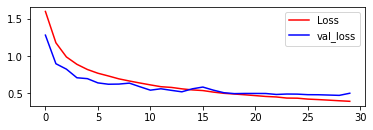

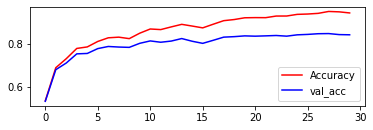

In [15]:
history = pd.DataFrame(history)

plt.subplot(211)
plt.plot(history.loss, color = 'red', label = 'Loss')
plt.plot(history.val_loss, color = 'blue', label = 'val_loss')
plt.legend()
plt.show()

plt.subplot(212)
plt.plot(history.accuracy, color = 'red', label = 'Accuracy')
plt.plot(history.val_accuracy, color = 'blue', label = 'val_acc')
plt.legend()
plt.show()

## Function for prediction

In [18]:
def prediction(image):
  net.eval()

  with torch.no_grad():
    image = image.to(device)
    output = net(image)
    cls = torch.argmax(output)
  classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
              'horse', 'ship', 'truck']
  sm = nn.Softmax(dim=1)
  return classes[cls], sm(output)[0][cls].item(), cls

## Sample predictions

In [23]:
sample = next(iter(test))
image = sample[0][20]
iimage = torch.unsqueeze(image, 0)
pred, prob, _ = prediction(iimage)
print(f'Predicted class: {pred} | Probability: {prob}')

Predicted class: dog | Probability: 0.9992523789405823


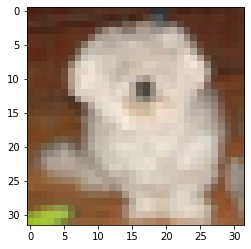

In [24]:
plt.imshow(np.asarray(image).transpose(1, 2, 0))

In [25]:
sample = next(iter(test))
image = sample[0][20]
iimage = torch.unsqueeze(image, 0)
pred, prob, _ = prediction(iimage)
print(f'Predicted class: {pred} | Probability: {prob}')

Predicted class: truck | Probability: 0.9980837106704712


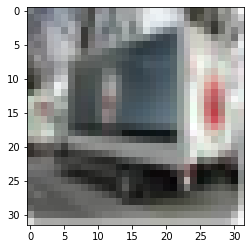

In [26]:
plt.imshow(np.asarray(image).transpose(1, 2, 0))

In [27]:
sample = next(iter(test))
image = sample[0][20]
iimage = torch.unsqueeze(image, 0)
pred, prob, _ = prediction(iimage)
print(f'Predicted class: {pred} | Probability: {prob}')

Predicted class: deer | Probability: 0.48400968313217163


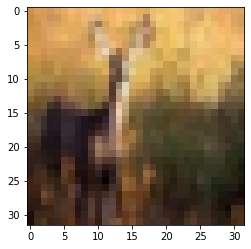

In [28]:
plt.imshow(np.asarray(image).transpose(1, 2, 0))

# Thank you
### by S.R.Vishal